In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
xls = pd.ExcelFile("data/帳戶schema.xlsx")
Onshore= xls.parse(1)
Offshore = xls.parse(3)
Omnibus = xls.parse(5)

# Onshore

In [3]:
def new_city(x):
    x=x[:3]
    new=["新北市","桃園市","台中市","高雄市","台南市"]
    old = ["台北縣","桃園縣","台中縣","高雄縣","台南縣"]
    if x in old:
        return new[old.index(x)]
    else:
        return x
def city_group(x):
    city = {"北部":["台北市","新北市","基隆市","新竹市","桃園市","新竹縣"],"中部":["台中市","苗栗縣","彰化縣","南投縣","雲林縣"],
            "南部":["高雄市","台南市","嘉義市","嘉義縣","屏東縣","澎湖縣"],"東部":["宜蘭縣","花蓮縣","台東縣"]}
    for area in city:
        if x in city[area]:
            return area
#AGE
Onshore["age"] = pd.to_datetime(Onshore['birthdate'].astype(str), format='%Y/%m/%d').apply(lambda x:2018 - x.year)
#location
Onshore["location"] = Onshore.address1_line1.apply(new_city)
#area
Onshore["area"] =  Onshore.location.apply(city_group)

In [4]:
Onshore.head()

,accountdate,accountnumber,accountid,accountname,identifycode,birthdate,gendercode,beneficiariescountry,beneficiariestype,telephone1,...,institutionname,salescode,salesname,lifeinsurancefundslicense,ownerid,updatedate,DMID,age,location,area
0,2017-08-25,318225,1219493,林ＯＯ,G221******,1977-08-28,F,臺灣,個人(自然人),NaN,...,郵局代銷,SEC00TEAM1,TＯam1 SE,NaN,NaN,2017-08-28 10:04:43.680,D30F94F0-CF2C-D6D2-E495-91101AC709A9,41,新北市,北部
1,2017-08-17,318201,1219469,黃ＯＯ,Q223******,1994-02-13,F,臺灣,個人(自然人),NaN,...,CY603,A0567,周Ｏ賢,NaN,NaN,2017-08-25 17:40:48.570,6F9A42BF-6FB3-1D1F-BD2D-DA7B35CEADDF,24,嘉義縣,南部
2,2017-08-29,318232,1219500,林ＯＯ,C121******,1992-12-01,M,臺灣,個人(自然人),02XX321748,...,北區壽險組,LF00000001,壽Ｏ通路投信,NaN,NaN,2017-08-30 09:40:57.237,33089EEE-2013-9BC2-00D2-0A3747155F2F,26,基隆市,北部
3,2017-08-16,318187,1219455,羅ＯＯ,N222******,1965-01-15,F,臺灣,個人(自然人),NaN,...,台中分公司,A0715,郭Ｏ展,NaN,NaN,2017-08-17 08:57:42.257,7621EA85-189E-9DE3-A7B1-A974B51942DC,53,彰化縣,中部
4,2017-09-05,318259,1219525,葉ＯＯ,B120******,1970-02-26,M,臺灣,個人(自然人),04XX739803,...,台中分公司,A0288,龔Ｏ銘,NaN,NaN,2017-09-06 10:26:50.473,256C0068-8779-8CB7-5E62-20E565B795E0,48,台中市,中部


In [5]:
Onshore_person = Onshore[Onshore.beneficiariestype=="個人(自然人)"].copy()

In [6]:
#受益人類別
Onshore.groupby("agentcode")["beneficiariestype"].value_counts().to_frame().unstack().fillna(0)

beneficiariestype     
beneficiariestype           個人(自然人) 民營事業
agentcode                               
311710                          1.0  0.0
A000159078                      8.0  0.0
A0275                           0.0  1.0
A0278                           1.0  0.0
A0288                           1.0  0.0
A0307                           0.0  4.0
A0367                           3.0  0.0
A0431                          12.0  0.0
A0460                           1.0  0.0
A0524                          14.0  0.0
A0532                           2.0  0.0
A0639                           1.0  0.0
A0642                           2.0  0.0
A0700                           2.0  0.0
A0715                           1.0  0.0
A0769                          24.0  0.0
A0776                           2.0  0.0
A0780                           1.0  1.0
C000467580                      1.0  0.0
H000141315                      1.0  0.0
J000725232                      1.0  0.0
L000523853                      1.0  0.0
LF00000001                      1.0  0.0
N001809176                      1.0  0.0
N001980909                      1.0  0.0
R001155043                      1.0  0.0
RCAM1                           8.0  0.0
S000589626                      2.0  0.0

In [7]:
#性別
gender_on = Onshore_person.groupby("agentcode")["gendercode"].value_counts().to_frame().unstack().fillna(0)
#區域
area_on = Onshore_person.groupby("agentcode")["area"].value_counts().to_frame().unstack().fillna(0)
#年齡
def age_group(x):
    if x<30:
        return "青年"
    elif x>65:
        return "老年"
    else:
        return "中年"

Onshore_person["age_group"] = Onshore_person.age.apply(age_group)
age_on = Onshore_person.groupby("agentcode")["age_group"].value_counts().to_frame().unstack().fillna(0)

In [8]:
pd.concat([gender_on,age_on,area_on],axis=1)

gendercode      age_group           area                
gendercode          F    M        中年   老年   青年   中部    北部   南部   東部
agentcode                                                          
311710            1.0  0.0       1.0  0.0  0.0  0.0   1.0  0.0  0.0
A000159078        2.0  6.0       2.0  0.0  6.0  0.0   8.0  0.0  0.0
A0278             1.0  0.0       1.0  0.0  0.0  0.0   1.0  0.0  0.0
A0288             0.0  1.0       1.0  0.0  0.0  1.0   0.0  0.0  0.0
A0367             0.0  3.0       2.0  1.0  0.0  0.0   0.0  3.0  0.0
A0431             8.0  4.0       7.0  0.0  5.0  2.0   9.0  1.0  0.0
A0460             1.0  0.0       1.0  0.0  0.0  0.0   1.0  0.0  0.0
A0524            11.0  3.0      11.0  1.0  2.0  3.0   6.0  5.0  0.0
A0532             2.0  0.0       2.0  0.0  0.0  0.0   2.0  0.0  0.0
A0639             0.0  1.0       1.0  0.0  0.0  0.0   0.0  1.0  0.0
A0642             1.0  1.0       2.0  0.0  0.0  0.0   0.0  2.0  0.0
A0700             1.0  1.0       2.0  0.0  0.0  0.0   2.0  0.0  0.0
A0715             1.0  0.0       1.0  0.0  0.0  1.0   0.0  0.0  0.0
A0769            15.0  9.0      17.0  2.0  5.0  5.0  16.0  2.0  1.0
A0776             2.0  0.0       1.0  0.0  1.0  0.0   0.0  2.0  0.0
A0780             0.0  1.0       1.0  0.0  0.0  0.0   1.0  0.0  0.0
C000467580        1.0  0.0       1.0  0.0  0.0  0.0   1.0  0.0  0.0
H000141315        0.0  1.0       0.0  0.0  1.0  0.0   1.0  0.0  0.0
J000725232        1.0  0.0       1.0  0.0  0.0  0.0   1.0  0.0  0.0
L000523853        0.0  1.0       1.0  0.0  0.0  0.0   1.0  0.0  0.0
LF00000001        0.0  1.0       0.0  0.0  1.0  0.0   1.0  0.0  0.0
N001809176        1.0  0.0       0.0  0.0  1.0  1.0   0.0  0.0  0.0
N001980909        1.0  0.0       0.0  0.0  1.0  1.0   0.0  0.0  0.0
R001155043        1.0  0.0       0.0  0.0  1.0  0.0   0.0  1.0  0.0
RCAM1             4.0  4.0       4.0  4.0  0.0  2.0   4.0  2.0  0.0
S000589626        0.0  2.0       0.0  0.0  2.0  0.0   0.0  2.0  0.0

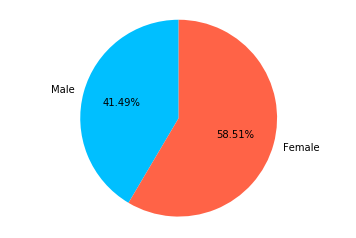

In [9]:
gender = [len(Onshore_person[Onshore_person.gendercode=="M"]),len(Onshore_person[Onshore_person.gendercode=="F"])]
tag = "Male","Female"
c = ["deepskyblue","tomato"]
fig1, ax1 = plt.subplots()
ax1.pie(gender, colors=c,autopct='%1.2f%%',labels=tag,startangle=90) 
ax1.axis('equal')
plt.show()

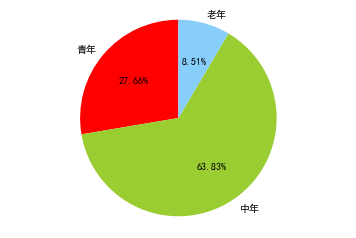

In [10]:
age = [len(Onshore_person[Onshore_person.age_group=="青年"]),len(Onshore_person[Onshore_person.age_group=="中年"]),len(Onshore_person[Onshore_person.age_group=="老年"])]
tag = "青年","中年","老年"
c = ['red','yellowgreen','lightskyblue']
fig1, ax1 = plt.subplots()
ax1.pie(age, colors=c,autopct='%1.2f%%',labels=tag,startangle=90) 
ax1.axis('equal')
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.show()

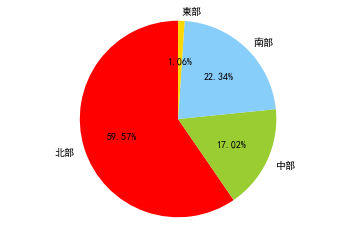

In [11]:
area = [len(Onshore_person[Onshore_person.area=="北部"]),len(Onshore_person[Onshore_person.area=="中部"]),
        len(Onshore_person[Onshore_person.area=="南部"]),len(Onshore_person[Onshore_person.area=="東部"])]
tag = "北部","中部","南部","東部"
c = ['red','yellowgreen','lightskyblue','gold']
fig1, ax1 = plt.subplots()
ax1.pie(area, colors=c,autopct='%1.2f%%',labels=tag,startangle=90) 
ax1.axis('equal')
plt.show()

# Offshore

In [12]:
#AGE
Offshore["age"] = pd.to_datetime(Offshore['birthdate'].astype(str), format='%Y/%m/%d').apply(lambda x:2018 - x.year)
#location
Offshore["location"] = Offshore.address1_composite.apply(new_city)
#area
Offshore["area"] = Offshore.location.apply(city_group)
#age
Offshore["age_group"] = Offshore.age.apply(age_group)

In [13]:
Offshore.head()

,accountnumber,accountid,identifycode,gendercode,birthdate,accountname,englishlastname,englishfirstname,telephone1,telephone2,...,status,lifeinsurancefundslicense,ownerid,accountdate,updatedate,DMID,age,location,area,age_group
0,3158,936077,A222******,F,1965-03-31,林Ｏ柔 ...,...,PEI-JOU ...,,,...,D,NaN,NaN,1996-11-11,2006-02-08,CCD01D2C-A0BB-0150-B56C-A16543C78D61,53.0,新北市,北部,中年
1,40,1046036,G120******,M,1958-11-18,楊Ｏ宗 ...,...,YIN-TSUNG ...,,,...,D,NaN,NaN,2000-01-14,2006-02-08,6FCBE594-8DA6-AC31-A42A-237DC7F56816,60.0,台北市,北部,中年
2,3093,1069189,A127******,M,1966-11-22,孫Ｏ傑 ...,...,YING-CHIEH ...,,,...,,NaN,NaN,1996-10-16,2015-05-29,7BBFBC22-C799-26D8-1EED-A7490ECFD156,52.0,台北市,北部,中年
3,3145,1080213,A102******,M,1947-11-20,徐Ｏ堯 ...,...,YONG-YAO ...,,,...,,NaN,NaN,1996-11-04,2015-05-26,15FB3270-AD0A-BDB1-D4C5-7037120D2A6D,71.0,台北市,北部,老年
4,131,1226301,D220******,M,1956-07-12,陳Ｏ英 ...,...,YUN-YIN ...,,,...,D,NaN,NaN,2000-02-23,2000-02-23,853AD3BA-0983-B0AA-DFE4-2AB291C392B2,62.0,台北市,北部,中年


In [14]:
#性別
gender_off = Offshore.groupby("agentcode")["gendercode"].value_counts().to_frame().unstack().fillna(0)
#區域
area_off = Offshore.groupby("agentcode")["area"].value_counts().to_frame().unstack().fillna(0)
#年齡
age_off = Offshore.groupby("agentcode")["age_group"].value_counts().to_frame().unstack().fillna(0)

In [15]:
pd.concat([gender_off,age_off,area_off],axis=1)

C:\Users\chloe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


gendercode      age_group           area                
gendercode          F    M        中年   老年   青年   中部    北部   南部   東部
A000514964        1.0  0.0       1.0  0.0  0.0  0.0   1.0  0.0  0.0
A000802736        1.0  0.0       1.0  0.0  0.0  NaN   NaN  NaN  NaN
A0243             1.0  0.0       1.0  0.0  0.0  1.0   0.0  0.0  0.0
A0257             1.0  0.0       1.0  0.0  0.0  0.0   0.0  1.0  0.0
A0264             1.0  1.0       2.0  0.0  0.0  0.0   2.0  0.0  0.0
A0269             0.0  2.0       0.0  2.0  0.0  0.0   0.0  2.0  0.0
A0273             0.0  1.0       0.0  1.0  0.0  0.0   0.0  1.0  0.0
A0278             2.0  0.0       2.0  0.0  0.0  0.0   2.0  0.0  0.0
A0291             0.0  2.0       2.0  0.0  0.0  0.0   2.0  0.0  0.0
A110169660        1.0  0.0       0.0  1.0  0.0  0.0   1.0  0.0  0.0
B0059             1.0  3.0       2.0  2.0  0.0  0.0   2.0  1.0  0.0
B0152             3.0  0.0       2.0  0.0  1.0  0.0   0.0  1.0  0.0
B0165             5.0  3.0       6.0  1.0  1.0  0.0   8.0  0.0  0.0
B0174             0.0  2.0       1.0  1.0  0.0  1.0   0.0  0.0  0.0
B0211             6.0  3.0       7.0  2.0  0.0  0.0   1.0  7.0  0.0
B0264            10.0  5.0      11.0  3.0  1.0  0.0  15.0  0.0  0.0
B120564347        0.0  1.0       1.0  0.0  0.0  1.0   0.0  0.0  0.0
B220837687        1.0  0.0       1.0  0.0  0.0  1.0   0.0  0.0  0.0
C000082490        0.0  1.0       0.0  1.0  0.0  0.0   1.0  0.0  0.0
C000635482        1.0  0.0       0.0  0.0  1.0  0.0   0.0  1.0  0.0
C200656249        3.0  0.0       1.0  2.0  0.0  0.0   3.0  0.0  0.0
C220432405        3.0  2.0       3.0  2.0  0.0  0.0   5.0  0.0  0.0
D001396636        1.0  0.0       1.0  0.0  0.0  0.0   1.0  0.0  0.0
E120082665        1.0  0.0       0.0  0.0  1.0  0.0   0.0  1.0  0.0
F001097992        0.0  1.0       1.0  0.0  0.0  NaN   NaN  NaN  NaN
F002177197        1.0  1.0       2.0  0.0  0.0  0.0   2.0  0.0  0.0
F120359206        1.0  0.0       1.0  0.0  0.0  NaN   NaN  NaN  NaN
G000878832        1.0  0.0       1.0  0.0  0.0  NaN   NaN  NaN  NaN
H001713333        0.0  1.0       1.0  0.0  0.0  0.0   1.0  0.0  0.0
LF00000001        3.0  3.0       2.0  1.0  3.0  0.0   2.0  0.0  0.0
M201495524        1.0  0.0       1.0  0.0  0.0  NaN   NaN  NaN  NaN
R001833442        0.0  1.0       0.0  0.0  1.0  NaN   NaN  NaN  NaN
R102998035        3.0  9.0      11.0  1.0  0.0  0.0  10.0  0.0  1.0
RCAM2             0.0  2.0       2.0  0.0  0.0  0.0   2.0  0.0  0.0
S000940941        1.0  0.0       1.0  0.0  0.0  NaN   NaN  NaN  NaN
V120016021        0.0  1.0       0.0  0.0  1.0  NaN   NaN  NaN  NaN
Z100101639        0.0  1.0       1.0  0.0  0.0  NaN   NaN  NaN  NaN

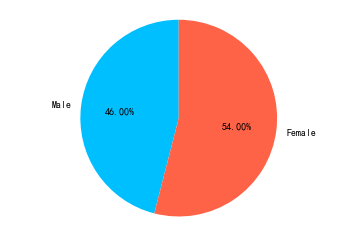

In [16]:
gender = [len(Offshore[Offshore.gendercode=="M"]),len(Offshore[Offshore.gendercode=="F"])]
tag = "Male","Female"
c = ["deepskyblue","tomato"]
fig1, ax1 = plt.subplots()
ax1.pie(gender, colors=c,autopct='%1.2f%%',labels=tag,startangle=90) 
ax1.axis('equal')
plt.show()

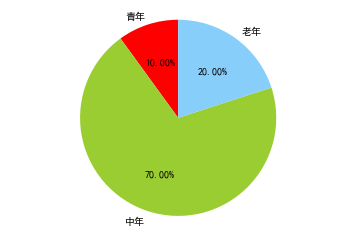

In [17]:
age = [len(Offshore[Offshore.age_group=="青年"]),len(Offshore[Offshore.age_group=="中年"]),len(Offshore[Offshore.age_group=="老年"])]
tag = "青年","中年","老年"
c = ['red','yellowgreen','lightskyblue']
fig1, ax1 = plt.subplots()
ax1.pie(age, colors=c,autopct='%1.2f%%',labels=tag,startangle=90) 
ax1.axis('equal')
plt.show()

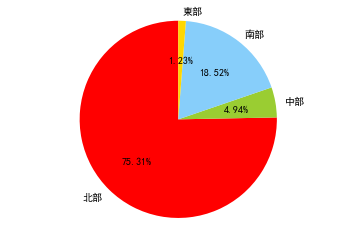

In [18]:
area = [len(Offshore[Offshore.area=="北部"]),len(Offshore[Offshore.area=="中部"]),
        len(Offshore[Offshore.area=="南部"]),len(Offshore[Offshore.area=="東部"])]
tag = "北部","中部","南部","東部"
c = ['red','yellowgreen','lightskyblue','gold']
fig1, ax1 = plt.subplots()
ax1.pie(area, colors=c,autopct='%1.2f%%',labels=tag,startangle=90) 
ax1.axis('equal')
plt.show()